# Import libraries

In [1]:
import sys

sys.path.insert(0,'..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Investigate effect of different hyperparameters

In [18]:
results_df_l1 = pd.read_csv("../output/nmf_decomposition.py/results_reg_comparison_l1.csv")
results_df_l1["reg_name"] = "L1"

results_df_l12 = pd.read_csv("../output/nmf_decomposition.py/results_reg_comparison_l1l2.csv")
results_df_l12["reg_name"] = "L12"

results_df_l2 = pd.read_csv("../output/nmf_decomposition.py/results_reg_comparison_l2.csv")
results_df_l2["reg_name"] = "L2"

results_df_o = pd.read_csv("../output/nmf_decomposition.py/results_reg_comparison_ortho.csv")
results_df_o["reg_name"] = "Ortho"

results_df_l12o = pd.read_csv("../output/nmf_decomposition.py/results_reg_comparison_ortho+l1l2.csv")
results_df_l12o["reg_name"] = "L12 + Ortho"

results_df_l1o = pd.read_csv("../output/nmf_decomposition.py/results_reg_comparison_ortho+l1.csv")
results_df_l1o["reg_name"] = "L1 + Ortho"

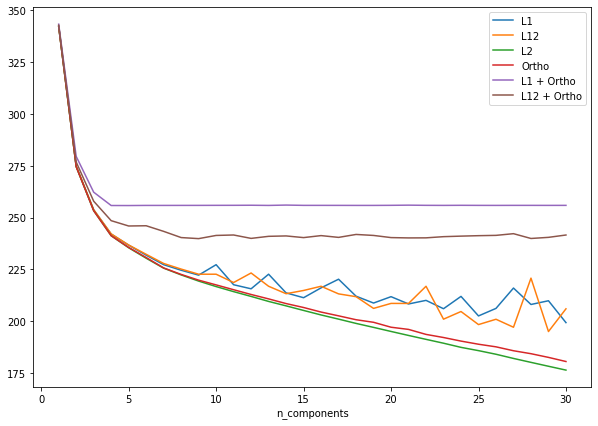

In [21]:
df = pd.concat([results_df_l1, results_df_l12, results_df_l2, results_df_o, results_df_l1o, results_df_l12o])

fig, ax = plt.subplots(figsize=(10,7))
for reg in df["reg_name"].unique():
    df[df["reg_name"] == reg].plot(ax=ax, x="n_components", y="violation", label=reg)

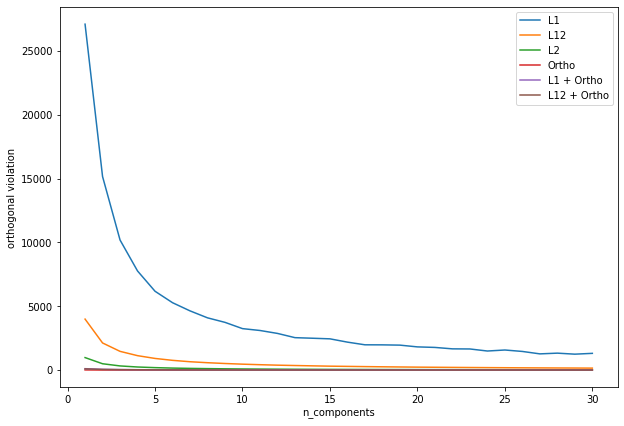

In [28]:
df = pd.concat([results_df_l1, results_df_l12, results_df_l2, results_df_o, results_df_l1o, results_df_l12o])

fig, ax = plt.subplots(figsize=(10,7))
for reg in df["reg_name"].unique():
    df[df["reg_name"] == reg].plot(ax=ax, x="n_components", y="ortho_components", label=reg, ylabel="orthogonal violation")

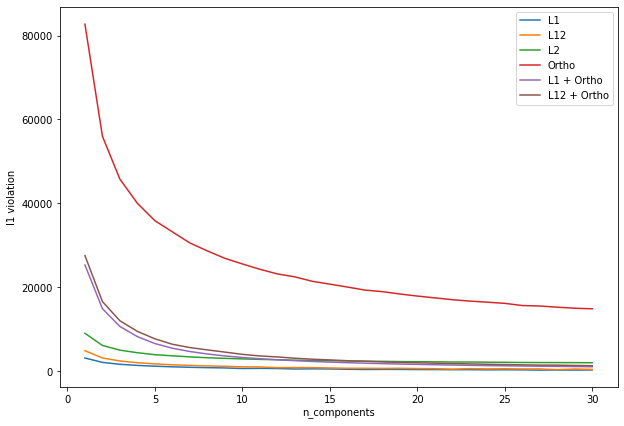

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
for reg in df["reg_name"].unique():
    df[df["reg_name"] == reg].plot(ax=ax, x="n_components", y="l1_sum", label=reg, ylabel="l1 violation")

In [27]:
list(np.round(np.arange(1, 31)/10, 2))

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0]

# Ortho Loss

In [25]:
results_df = pd.read_csv("../output/nmf_decomposition.py/results_orthogonal_loss.csv")
results_df = results_df.drop_duplicates(subset=['ortho_reg', 'n_components'])
len(results_df)

100

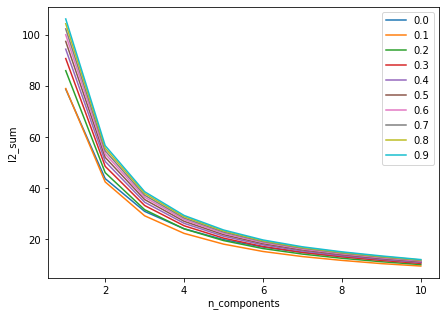

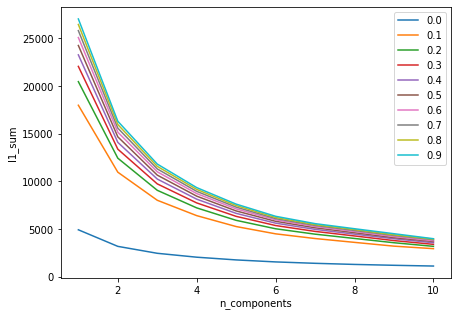

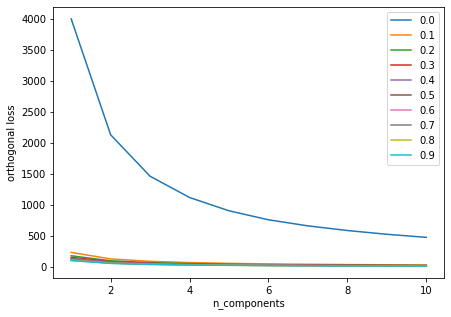

In [32]:
ortho_reg = [0.0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

fig, ax = plt.subplots(figsize=(7,5))
for o in ortho_reg: 
    results_df[(results_df.init == "nndsvda")&(results_df.ortho_reg==o)].plot(ax=ax, x="n_components", y=["l2_sum"], label=[f"{o}"], ylabel="l2_sum")


fig, ax = plt.subplots(figsize=(7,5))
for o in ortho_reg: 
    results_df[(results_df.init == "nndsvda")&(results_df.ortho_reg==o)].plot(ax=ax, x="n_components", y=["l1_sum"], label=[f"{o}"], ylabel="l1_sum")


fig, ax = plt.subplots(figsize=(7,5))
for o in ortho_reg: 
    results_df[(results_df.init == "nndsvda")&(results_df.ortho_reg==o)].plot(ax=ax, x="n_components", y=["ortho_components"], label=[f"{o}"], ylabel="orthogonal loss")


## Initialization

In [64]:
results_df = pd.read_csv("../output/nmf_decomposition.py/results.csv")
len(results_df)

60

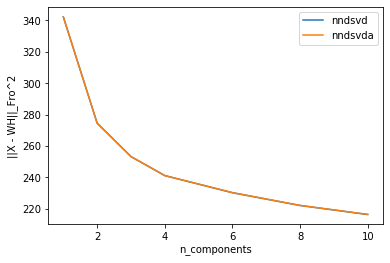

In [37]:
fig, ax = plt.subplots()

results_df[(results_df.init == "nndsvd") & 
           (results_df.alpha == 0) & 
           (results_df.regularization == "both") & 
           (results_df.l1_ratio == 0.0)].plot(ax=ax, x="n_components", y=["violation"], label=["nndsvd"])

results_df[(results_df.init == "nndsvda") & 
           (results_df.alpha == 0) & 
           (results_df.regularization == "both") & 
           (results_df.l1_ratio == 0.0)].plot(ax=ax,x="n_components", y=["violation"], label=["nndsvda"], ylabel="||X - WH||_Fro^2")
plt.show()

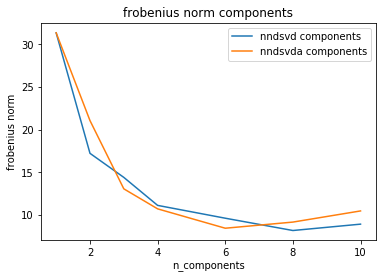

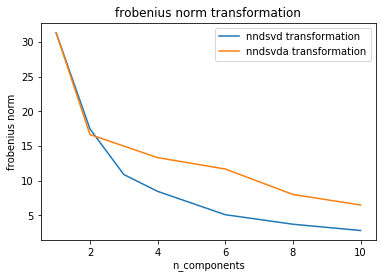

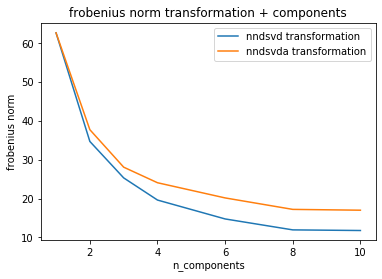

In [100]:
fixed_bool =  (results_df.alpha == 0) & (results_df.regularization == "both") & (results_df.l1_ratio == 0.0)

fig, ax = plt.subplots()
results_df[(results_df.init == "nndsvd") & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="nndsvd components")
results_df[(results_df.init == "nndsvda") & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="nndsvda components")
plt.ylabel("frobenius norm")
plt.title("frobenius norm components")
plt.show()

fig, ax = plt.subplots()
results_df[(results_df.init == "nndsvd") & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="nndsvd transformation")
results_df[(results_df.init == "nndsvda") & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="nndsvda transformation")
plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation")
plt.show()

fig, ax = plt.subplots()
results_df[(results_df.init == "nndsvd") & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="nndsvd transformation")
results_df[(results_df.init == "nndsvda") & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="nndsvda transformation")
plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation + components")
plt.show()

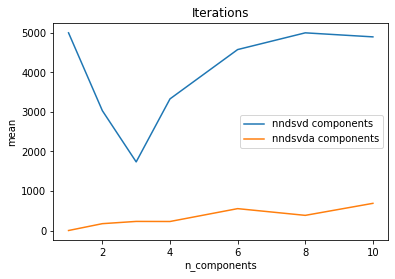

In [101]:
fig, ax = plt.subplots()
fixed_bool =  (results_df.alpha == 0) & (results_df.regularization == "both") & (results_df.l1_ratio == 0.0)
plt.ylabel("Iterations")

results_df[(results_df.init == "nndsvd") & fixed_bool].plot(ax=ax, x="n_components", y="n_iter", label="nndsvd components")
results_df[(results_df.init == "nndsvda") & fixed_bool].plot(ax=ax, x="n_components", y="n_iter", label="nndsvda components")
plt.show()

## Regularization

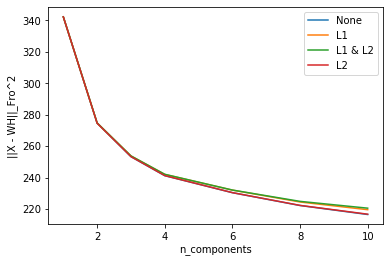

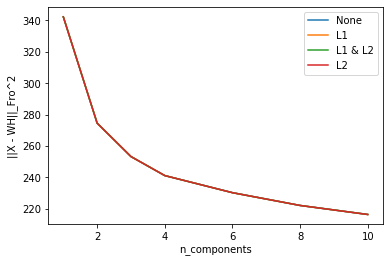

In [17]:
fixed_bool =  (results_df.init == "nndsvda") & (results_df.regularization == "both") 
fig, ax = plt.subplots()
results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax,x="n_components", y=["violation"], label=["None"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax,x="n_components", y=["violation"], label=["L1"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y=["violation"], label=["L1 & L2"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y=["violation"], label=["L2"], ylabel="||X - WH||_Fro^2")
plt.show()

fixed_bool =  (results_df.init == "nndsvda") & (results_df.regularization == "transformation") 
fig, ax = plt.subplots()
results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax,x="n_components", y=["violation"], label=["None"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax,x="n_components", y=["violation"], label=["L1"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y=["violation"], label=["L1 & L2"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y=["violation"], label=["L2"], ylabel="||X - WH||_Fro^2")
plt.show()

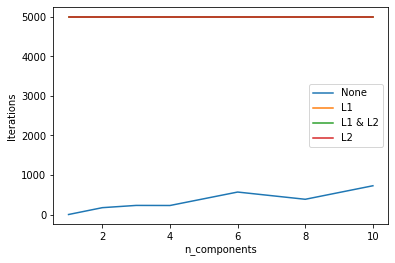

In [19]:
fixed_bool =  (results_df.init == "nndsvda") & (results_df.regularization == "transformation") 
fig, ax = plt.subplots()
results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax,x="n_components", y=["n_iter"], label=["None"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax,x="n_components", y=["n_iter"], label=["L1"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y=["n_iter"], label=["L1 & L2"])
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y=["n_iter"], label=["L2"], ylabel="Iterations")
plt.show()

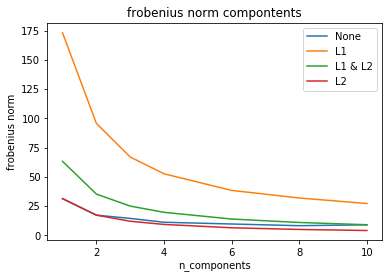

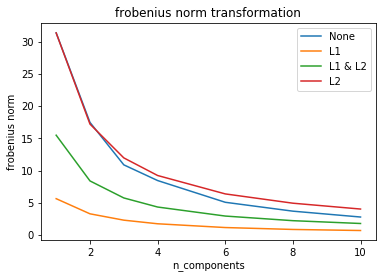

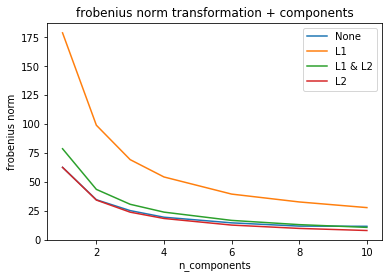

In [16]:
fig, ax = plt.subplots()
fixed_bool =  (results_df.init == "nndsvd") & (results_df.regularization == "both") 

results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="None")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="L1")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="L1 & L2")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="L2")
plt.ylabel("frobenius norm")
plt.title("frobenius norm compontents")
plt.show()

fig, ax = plt.subplots()

results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="None")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="L1")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="L1 & L2")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="L2")
plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation")
plt.show()

fig, ax = plt.subplots()

results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="None")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="L1")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="L1 & L2")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="L2")
plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation + components")
plt.show()

## Regularization

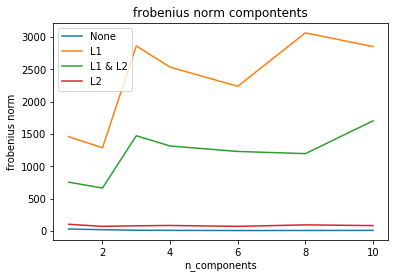

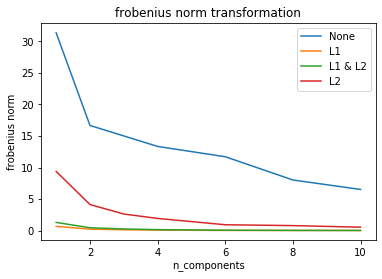

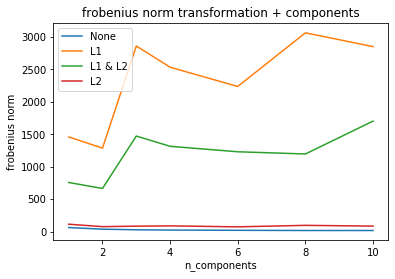

In [97]:
fixed_bool =  (results_df.init == "nndsvda") & (results_df.regularization == "transformation") 

fig, ax = plt.subplots()
results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="None")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="L1")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="L1 & L2")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_components", label="L2")
plt.ylabel("frobenius norm")
plt.title("frobenius norm compontents")
plt.show()

fig, ax = plt.subplots()
results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="None")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="L1")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="L1 & L2")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_transformation", label="L2")
plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation")
plt.show()

fig, ax = plt.subplots()
results_df[(results_df.alpha == 0) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="None")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 1.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="L1")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.5) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="L1 & L2")
results_df[(results_df.alpha == 1) & (results_df.l1_ratio == 0.0) & fixed_bool].plot(ax=ax, x="n_components", y="f_norm_sum", label="L2")
plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation + components")
plt.show()

# without stoping criterion

In [67]:
results_df = pd.read_csv("../output/nmf_decomposition.py/results_alpha.csv")
len(results_df)

60

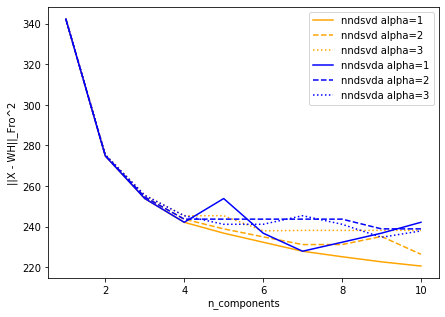

In [74]:
fig, ax = plt.subplots(figsize=(7,5))

results_df[(results_df.init == "nndsvd") & 
           (results_df.alpha == 1)].plot(ax=ax, x="n_components", y=["violation"], label=["nndsvd alpha=1"], c="orange", linestyle="-")
results_df[(results_df.init == "nndsvd") & 
           (results_df.alpha == 2)].plot(ax=ax, x="n_components", y=["violation"], label=["nndsvd alpha=2"], c="orange", linestyle="--")
results_df[(results_df.init == "nndsvd") & 
           (results_df.alpha == 3)].plot(ax=ax, x="n_components", y=["violation"], label=["nndsvd alpha=3"], c="orange", linestyle=":")

results_df[(results_df.init == "nndsvda") & 
           (results_df.alpha == 1)].plot(ax=ax, x="n_components", y=["violation"], label=["nndsvda alpha=1"], c="blue", linestyle="-")
results_df[(results_df.init == "nndsvda") & 
           (results_df.alpha == 2)].plot(ax=ax, x="n_components", y=["violation"], label=["nndsvda alpha=2"], c="blue", linestyle="--")
results_df[(results_df.init == "nndsvda") & 
           (results_df.alpha == 3)].plot(ax=ax, x="n_components", y=["violation"], label=["nndsvda alpha=3"], c="blue", linestyle=":", ylabel="||X - WH||_Fro^2")


plt.show()

# Weight Alpha

In [65]:
results_df = pd.read_csv("../output/nmf_decomposition.py/results_alpha.csv")
len(results_df)

60

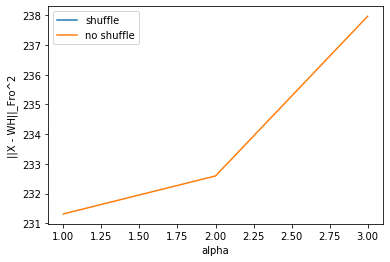

In [66]:
fig, ax = plt.subplots()
n_components = 10
results_df[(results_df.shuffle == False)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="violation", label="shuffle", ylabel="||X - WH||_Fro^2")
results_df[(results_df.shuffle == True)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="violation", label="no shuffle", ylabel="||X - WH||_Fro^2")
plt.show()

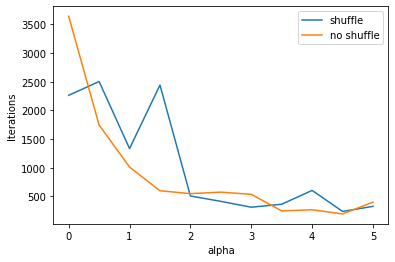

In [62]:
fig, ax = plt.subplots()
results_df[(results_df.shuffle == False)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="n_iter", label="shuffle", ylabel="Iterations")
results_df[(results_df.shuffle == True)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="n_iter", label="no shuffle")
plt.show()

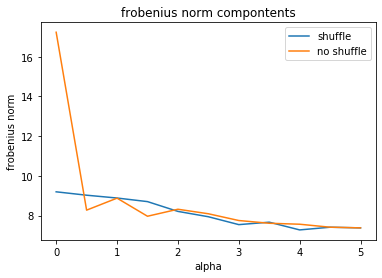

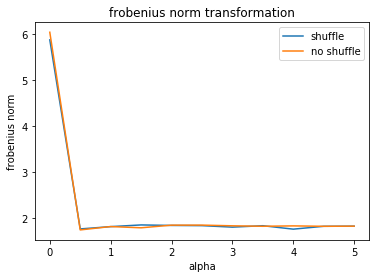

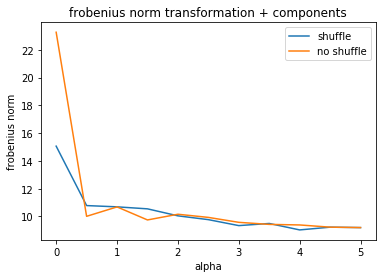

In [63]:
fig, ax = plt.subplots()
results_df[(results_df.shuffle == False)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="f_norm_components", label="shuffle")
results_df[(results_df.shuffle == True)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="f_norm_components", label="no shuffle")
plt.ylabel("frobenius norm")
plt.title("frobenius norm compontents")
plt.show()

fig, ax = plt.subplots()
results_df[(results_df.shuffle == False)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="f_norm_transformation", label="shuffle")
results_df[(results_df.shuffle == True)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="f_norm_transformation", label="no shuffle")
plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation")
plt.show()

fig, ax = plt.subplots()
results_df[(results_df.shuffle == False)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="f_norm_sum", label="shuffle")
results_df[(results_df.shuffle == True)& (results_df.n_components == n_components)].groupby('alpha').mean().plot(ax=ax, y="f_norm_sum", label="no shuffle")

plt.ylabel("frobenius norm")
plt.title("frobenius norm transformation + components")
plt.show()